In [1]:
import pandas as pd
import json
import plotly.plotly as py
import plotly.graph_objs as go
import datetime
import time
import numpy as np
import matplotlib.pyplot as plt

In [2]:
in_file = "btc_candles_5m.json"
data = json.load(open(in_file))

## Convert datas to integers

In [3]:
df = pd.DataFrame(data['Items'], columns=['mts', 'open', 'close', 'high', 'low', 'volume'])
print(df.shape)
df.head()

(13195, 6)


,mts,open,close,high,low,volume
0,{'S': '1526860500000'},{'S': '8520.4'},{'S': '8523.7'},{'S': '8524.9'},{'S': '8520.3'},{'S': '8.25352554'}
1,{'S': '1527086100000'},{'S': '7869.8'},{'S': '7882.3'},{'S': '7882.3'},{'S': '7869.8'},{'S': '22.44813276'}
2,{'S': '1527308100000'},{'S': '7399.86169477'},{'S': '7388.6'},{'S': '7399.86169477'},{'S': '7377.1'},{'S': '45.26981713'}
3,{'S': '1523301900000'},{'S': '6736.86545369'},{'S': '6721.09229148'},{'S': '6738'},{'S': '6721'},{'S': '45.99811741'}
4,{'S': '1522028700000'},{'S': '8392.6'},{'S': '8393.1'},{'S': '8401'},{'S': '8373.1'},{'S': '194.66606906'}


In [4]:
# Convert values to numeric
df = df.applymap(lambda x: x.get('S'))
df = df.apply(pd.to_numeric)

In [5]:
# Convert timestamp to datetime
df['mts'] = df['mts'].apply(lambda x: datetime.datetime.fromtimestamp(x/1000).strftime('%Y-%m-%d %H:%M:%S'))
df['mts'] = pd.to_datetime(df['mts'])

In [6]:
df.sort_values(by=['mts'],ascending=False).head()

,mts,open,close,high,low,volume
11591,2018-05-31 09:10:00,7572.0,7569.1,7572.1,7569.1,36.655475
13064,2018-05-31 08:55:00,7591.8,7570.2,7599.7,7570.0,183.709598
6889,2018-05-31 08:50:00,7585.5,7591.8,7591.8,7585.5,15.029588
1974,2018-05-31 08:45:00,7581.2,7585.5,7599.7,7573.8,401.193496
7852,2018-05-31 08:40:00,7564.9,7581.2,7582.0,7564.8,70.926725


## Plot Datas

In [7]:
# Plot datas
trace = go.Candlestick(x=df['mts'],
                       open=df['open'],
                       high=df['high'],
                       low=df['low'],
                       close=df['close'])

layout = go.Layout(
    xaxis = dict(
        rangeslider = dict(
            visible = False
        )
    )
)

data = [trace]

fig = go.Figure(data=data,layout=layout)
py.iplot(fig, filename='simple_candlestick')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~Vico49/0 or inside your plot.ly account where it is named 'simple_candlestick'


## Clear Datas

In [8]:
df_sorted = df.sort_values('mts', axis=0)
df_sorted = df_sorted.reset_index(drop=True)
display(df_sorted.head())

,mts,open,close,high,low,volume
0,2018-02-18 16:10:00,10725.0,10766.0,10790.000000,10724.0,292.561490
1,2018-02-18 16:15:00,10767.0,10820.0,10855.421627,10766.0,481.227888
2,2018-02-18 16:20:00,10819.0,10811.0,10830.000000,10784.0,154.277705
3,2018-02-18 16:30:00,10791.0,10767.0,10792.000000,10744.0,128.380381
4,2018-02-18 16:40:00,10759.0,10640.0,10765.000000,10640.0,467.427203


#### En regardant les différences temporelles on va supprimer toutes les données inutilisables au début (trop d'écarts entre les données)

In [26]:
def observations_not_5minutes_long(x):
    # Do substraction between one observation time stamp and the one before
    diff = (x['mts'][1:] - x['mts'][0:-1])[1:]
    h_decal = np.vstack((x['mts'][0:-1], x['mts'][1:])).transpose()
    df_decal = pd.DataFrame(h_decal, columns=['mts1', 'mts2'])
    df_decal['diff'] = [(row['mts2'] - row['mts1']) for index, row in df_decal.iterrows()]
    return (df_decal[(df_decal['diff'] != df_decal['diff'][0])])
display(observations_not_5minutes_long(df_sorted))

,mts1,mts2,diff
2,2018-02-18 16:20:00,2018-02-18 16:30:00,00:10:00
3,2018-02-18 16:30:00,2018-02-18 16:40:00,00:10:00
4,2018-02-18 16:40:00,2018-02-18 17:05:00,00:25:00
5,2018-02-18 17:05:00,2018-02-18 17:20:00,00:15:00
7,2018-02-18 17:25:00,2018-02-18 17:40:00,00:15:00
10,2018-02-18 17:50:00,2018-02-18 18:00:00,00:10:00
14,2018-02-18 18:15:00,2018-02-18 18:25:00,00:10:00
16,2018-02-18 18:30:00,2018-02-18 18:40:00,00:10:00
19,2018-02-18 18:50:00,2018-02-18 19:00:00,00:10:00
20,2018-02-18 19:00:00,2018-02-18 19:15:00,00:15:00


#####  ==> On enlève les données avant le 2018-03-15 21:00:00

In [10]:
df_without_begining = df_sorted.iloc[288:]
df_without_begining = df_without_begining.reset_index(drop=True)

display(df_without_begining.head())

,mts,open,close,high,low,volume
0,2018-03-16 14:05:00,8190.1,8168.9,8191.8,8159.0,104.476283
1,2018-03-16 14:10:00,8168.6,8160.5,8170.0,8150.0,220.114826
2,2018-03-16 14:15:00,8160.5,8164.3,8168.7,8155.9,43.175704
3,2018-03-16 14:20:00,8166.7,8414.0,8550.0,8164.3,3316.159099
4,2018-03-16 14:30:00,8518.8,8450.0,8545.0,8445.6,1306.265514


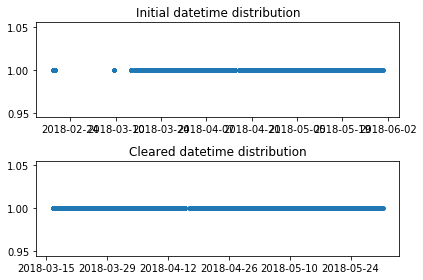

In [11]:
# Check With plots
plt.subplot(2, 1, 1)
plt.plot(df_sorted['mts'], np.ones(len(df_sorted['mts'])), '.')
plt.title('Initial datetime distribution')

plt.subplot(2, 1, 2)
plt.plot(df_without_begining['mts'], np.ones(len(df_without_begining['mts'])), '.')
plt.title('Cleared datetime distribution')

plt.tight_layout()
plt.show()

##### ==> On complète les données incomplètes

In [66]:
default_time = np.timedelta64(5, 'm')
missing_df = observations_not_5minutes_long(df_without_begining)

In [67]:
# Get date to add in dataframe
date_to_fill = []
for index, row in missing_df.iterrows():
    new_date = row['mts1'] + default_time
    while new_date < row['mts2']:
        date_to_fill.append(new_date)
        new_date = new_date + default_time

#df_without_begining = df_without_begining.append([])
#df = df.append({'A': i}, ignore_index=True)

In [68]:
# TODO : extrapole datas
date_to_fill

[Timestamp('2018-03-16 14:25:00'),
 Timestamp('2018-03-16 14:40:00'),
 Timestamp('2018-03-16 14:55:00'),
 Timestamp('2018-03-16 15:10:00'),
 Timestamp('2018-03-16 15:30:00'),
 Timestamp('2018-03-16 15:35:00'),
 Timestamp('2018-03-16 15:40:00'),
 Timestamp('2018-03-16 15:45:00'),
 Timestamp('2018-03-16 16:05:00'),
 Timestamp('2018-03-16 16:10:00'),
 Timestamp('2018-03-16 16:20:00'),
 Timestamp('2018-03-16 16:30:00'),
 Timestamp('2018-03-16 17:00:00'),
 Timestamp('2018-03-16 17:05:00'),
 Timestamp('2018-03-16 17:30:00'),
 Timestamp('2018-03-16 18:20:00'),
 Timestamp('2018-03-16 18:40:00'),
 Timestamp('2018-03-16 18:45:00'),
 Timestamp('2018-03-16 18:55:00'),
 Timestamp('2018-03-16 19:00:00'),
 Timestamp('2018-03-16 19:05:00'),
 Timestamp('2018-03-16 19:10:00'),
 Timestamp('2018-03-16 19:15:00'),
 Timestamp('2018-03-16 19:30:00'),
 Timestamp('2018-03-16 19:40:00'),
 Timestamp('2018-03-16 20:00:00'),
 Timestamp('2018-03-16 20:05:00'),
 Timestamp('2018-03-16 20:10:00'),
 Timestamp('2018-03-

### Modify datas to get more usefull ones

#### Use differences between open and close, max, min rather than absolute values

In [12]:
df_prepared = pd.concat([df_without_begining[['mts', 'volume', 'open']], df_without_begining[['close', 'high', "low"]].subtract(df_without_begining['open'], axis='index')], axis=1)

In [17]:
df_prepared.head(5)

,mts,volume,open,close,high,low
0,2018-03-16 14:05:00,104.476283,8190.1,-21.2,1.7,-31.1
1,2018-03-16 14:10:00,220.114826,8168.6,-8.1,1.4,-18.6
2,2018-03-16 14:15:00,43.175704,8160.5,3.8,8.2,-4.6
3,2018-03-16 14:20:00,3316.159099,8166.7,247.3,383.3,-2.4
4,2018-03-16 14:30:00,1306.265514,8518.8,-68.8,26.2,-73.2


#### Get X and Y dataframe

In [16]:
period_length = 50
X = [df_prepared.iloc[i:i + period_length] for i in range(0, df_prepared.shape[0] - period_length)]
y = [df_prepared.iloc[i + period_length] for i in range(0, df_prepared.shape[0] - period_length)]

In [22]:
X[0]

,mts,volume,open,close,high,low
0,2018-03-16 14:05:00,104.476283,8190.100000,-21.200000,1.700000,-31.100000
1,2018-03-16 14:10:00,220.114826,8168.600000,-8.100000,1.400000,-18.600000
2,2018-03-16 14:15:00,43.175704,8160.500000,3.800000,8.200000,-4.600000
3,2018-03-16 14:20:00,3316.159099,8166.700000,247.300000,383.300000,-2.400000
4,2018-03-16 14:30:00,1306.265514,8518.800000,-68.800000,26.200000,-73.200000
5,2018-03-16 14:35:00,580.145540,8449.900000,1.300000,50.100000,0.000000
6,2018-03-16 14:45:00,519.436706,8454.100000,11.300000,35.900000,-0.100000
7,2018-03-16 14:50:00,207.563736,8464.000000,-24.000000,14.600000,-24.000000
8,2018-03-16 15:00:00,423.435454,8461.300000,9.300000,23.500000,-11.400000
9,2018-03-16 15:05:00,769.555167,8470.700000,76.300000,103.400000,-3.500000


In [23]:
y[0]

mts       2018-03-16 21:00:00
volume                152.129
open                   8535.9
close                -3.30273
high                     10.1
low                     -44.9
Name: 50, dtype: object

## Modeles

### Méthode classsique sans prise en compte de la temporalité

In [17]:
df.head()

,mts,open,close,high,low,volume
0,2018-04-09 21:25:00,6736.865454,6721.092291,6738.0,6721.0,45.998117
1,2018-03-26 03:45:00,8392.600000,8393.100000,8401.0,8373.1,194.666069
2,2018-04-07 21:45:00,6975.400000,6985.100000,6986.5,6972.4,38.488938
3,2018-04-02 05:15:00,6953.800000,6952.800000,6958.9,6942.0,98.211349
4,2018-04-25 06:50:00,9250.000000,9263.600000,9276.0,9200.5,924.074428
